# 01 - Análise Exploratória de Dados (EDA)

In [4]:
# Importando as bibliotecas necessárias:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# Carregando o dataset:

df = pd.read_csv("dados_concreto.csv")

In [6]:
# Visualizando as primeiras linhas do dataset:

df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB


In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2020.000000
mean,415.147610,107.776688,78.604091,264.240315,9.045293,1444.538492,1139.313258,67.255643,35.886683
std,237.133806,145.230234,106.149019,111.056771,10.239884,604.194394,481.913282,103.260526,16.860121
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.100000
25%,250.000000,0.000000,0.000000,182.000000,0.000000,967.100000,776.400000,14.000000,23.500000
50%,350.400000,26.000000,0.000000,206.000000,7.800000,1104.000000,889.000000,28.000000,34.675000
75%,512.400000,187.000000,136.200000,345.800000,13.600000,1911.800000,1502.800000,75.600000,46.230000
max,1487.600000,923.700000,500.900000,639.900000,83.700000,3150.000000,2779.300000,1022.000000,87.200000


In [9]:
# Verificando as colunas do dataset:

df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength', 'Strength Category'],
      dtype='object')

In [10]:
# Criando Matriz de Correlação entre colunas:
# Selecionando apenas colunas numéricas:

df_numerico = df.select_dtypes(include=['float64', 'int64'])

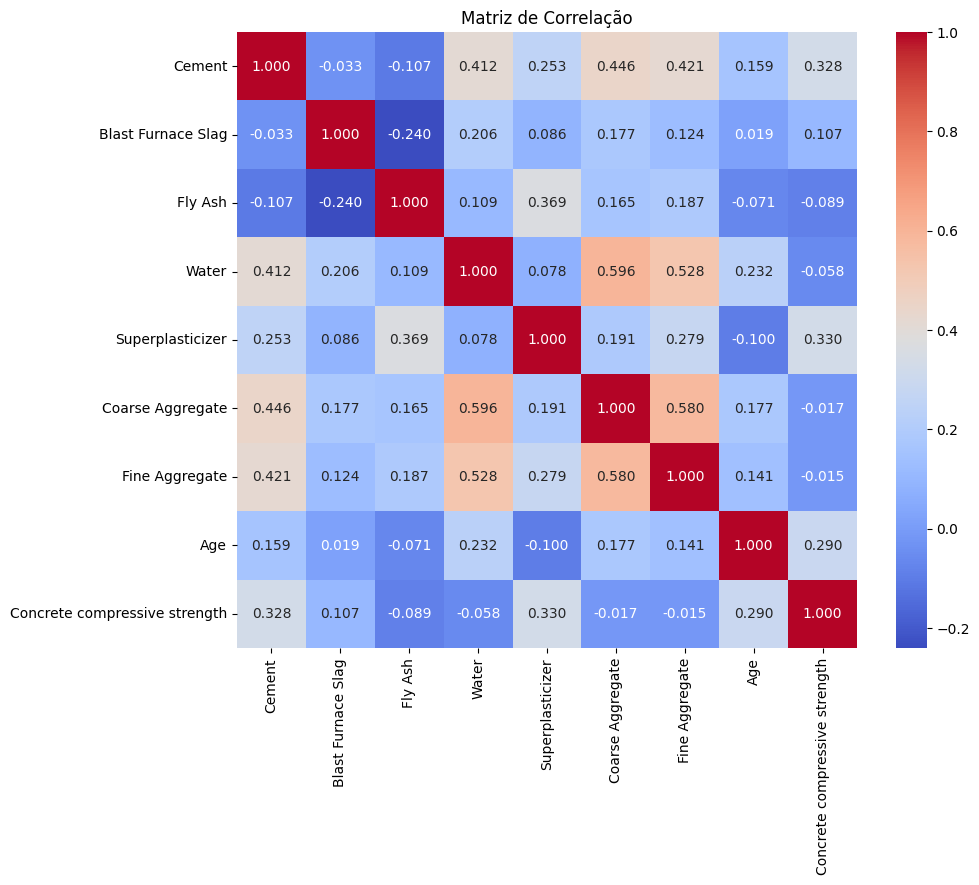

In [11]:
# Plotando gráfico de Matriz de correlação:

plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Matriz de Correlação")
plt.show()

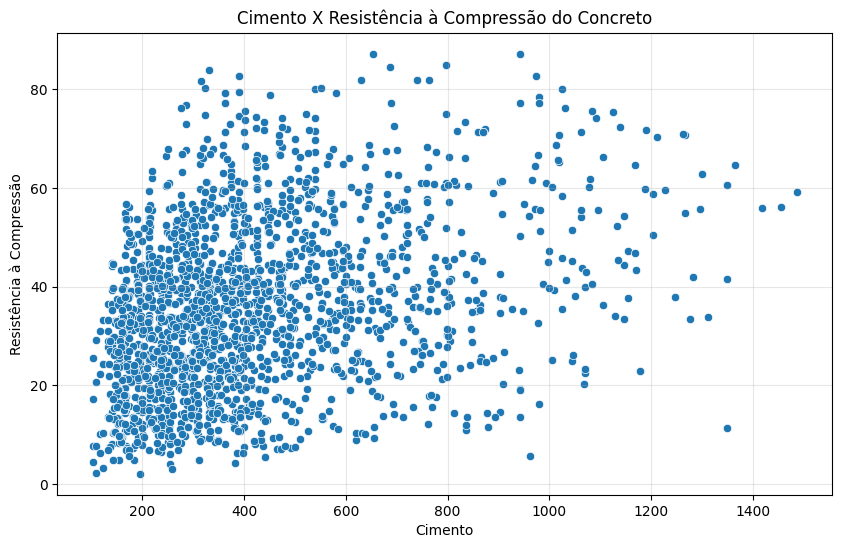

In [12]:
# Plotando gráfico de dispersão entre "Cement" e "Concrete compressive strength":

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cement', y='Concrete compressive strength')
plt.title('Cimento X Resistência à Compressão do Concreto')
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.xlabel('Cimento')
plt.ylabel('Resistência à Compressão')
plt.grid(True)
plt.show()

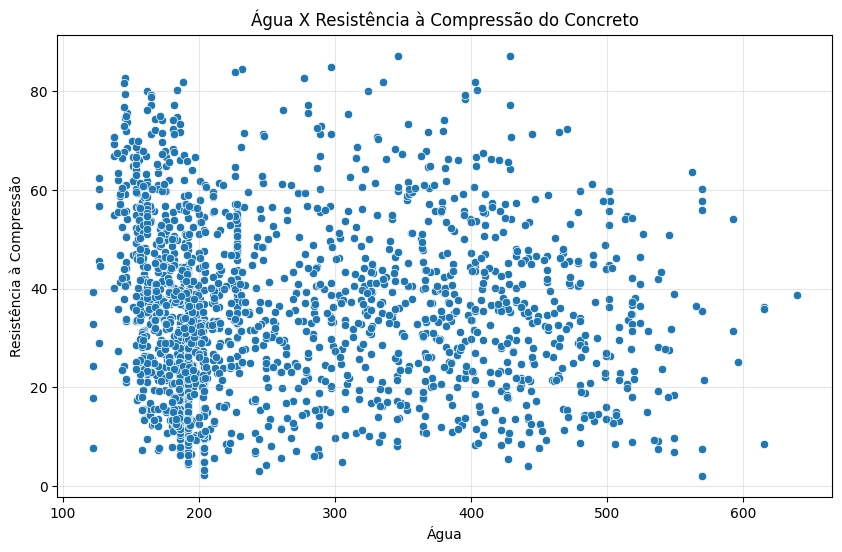

In [13]:
# Plotando gráfico de dispersão entre "Water" e "Concrete compressive strength":

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Water', y='Concrete compressive strength')
plt.title('Água X Resistência à Compressão do Concreto')
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.xlabel('Água')
plt.ylabel('Resistência à Compressão')
plt.grid(True)
plt.show()

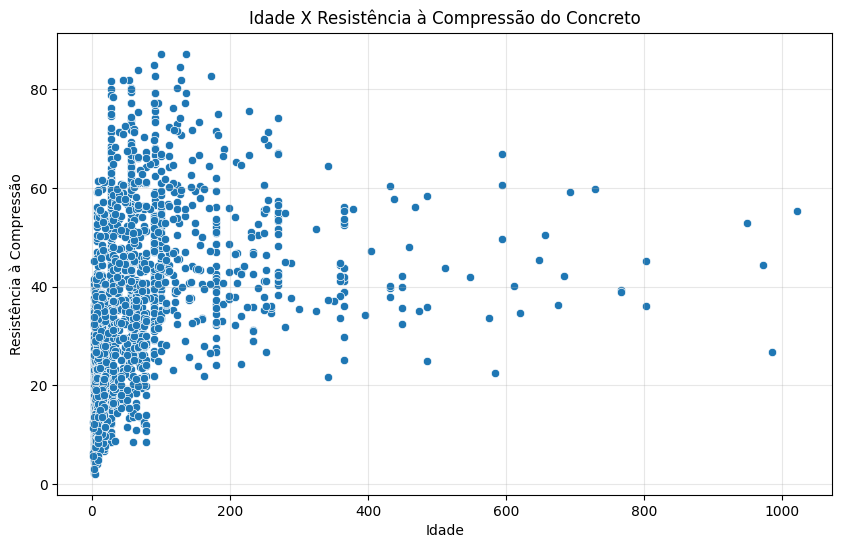

In [14]:
# Plotando gráfico de dispersão entre "Age" e "Concrete compressive strength":

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Concrete compressive strength')
plt.title('Idade X Resistência à Compressão do Concreto')
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.xlabel('Idade')
plt.ylabel('Resistência à Compressão')
plt.grid(True)
plt.show()

In [15]:
# Calculando a resistência média por "Strength Category" (Alta, Média, Baixa):

resistencia_media = df.groupby('Strength Category')['Concrete compressive strength'].mean().sort_values()
print(resistencia_media)

Strength Category
Baixa    32.488236
Alto     68.810265
Name: Concrete compressive strength, dtype: float64


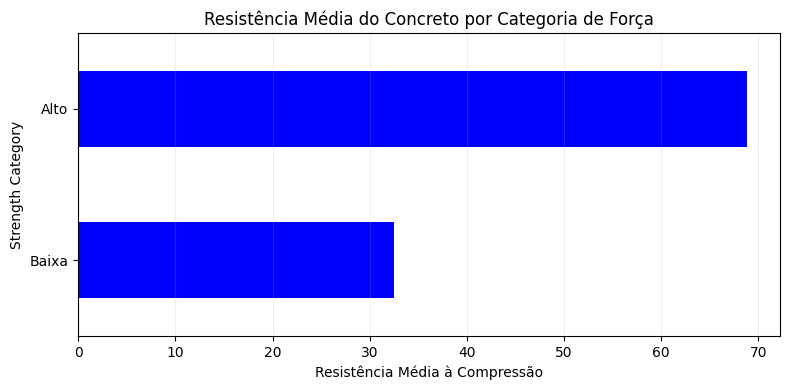

In [16]:
# Plotando gráfico de barras horizontais:

plt.figure(figsize=(8, 4))
resistencia_media.plot(kind='barh', color='blue')
plt.xlabel('Resistência Média à Compressão')
plt.title('Resistência Média do Concreto por Categoria de Força')
plt.grid(axis='x', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

# 02 - Tratamento de Dados

In [17]:
# Informações gerais:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB


In [18]:
# Verificando a presença de valores nulos:

print(df.isnull().sum())

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    9
Strength Category                0
dtype: int64


In [19]:
# Removendo os dados nulos:

df = df.dropna(subset=['Concrete compressive strength'])

In [20]:
# Verificando novamente a presença de valores nulos:

print(df.isnull().sum())

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
Strength Category                0
dtype: int64


In [21]:
# Aplicando One-Hot Encoding na coluna "Strength Category":

df_encoded = pd.get_dummies(df, columns=['Strength Category'], prefix=['Strength Category'],drop_first=True , dtype= int)

df_encoded.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category_Baixa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,1


In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2020 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2020 non-null   float64
 1   Blast Furnace Slag             2020 non-null   float64
 2   Fly Ash                        2020 non-null   float64
 3   Water                          2020 non-null   float64
 4   Superplasticizer               2020 non-null   float64
 5   Coarse Aggregate               2020 non-null   float64
 6   Fine Aggregate                 2020 non-null   float64
 7   Age                            2020 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category_Baixa        2020 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 173.6 KB


# 03 - Construção e Avaliação de Modelos de Regressão

In [23]:
# Importando bibliotecas necessárias para este módulo:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [24]:
# Definindo X e y:

# y: variável alvo
y = df_encoded['Concrete compressive strength']

# X: demais variáveis
X = df_encoded.drop(['Concrete compressive strength'], axis=1)

In [25]:
# Dividindo os dados entre treino e teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Normalizando os dados para Regressão Linear:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Modelo 1 - Random Forest Regressor

In [27]:
# Treinando o modelo:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Realizando as previsões:

y_pred_rf = rf_model.predict(X_test)

In [29]:
# Avaliação do modelo:

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [30]:
# Exibindo os resultados para Random Forest Regressor:

print(f"Random Forest Regressor:")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

Random Forest Regressor:
MAE: 5.01
R²: 0.82


Modelo 2 - Regressão Linear

In [31]:
# Treinando o modelo:

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# Realizando as previsões:

y_pred_lr = lr_model.predict(X_test_scaled)

In [33]:
# Avaliação do modelo:

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [34]:
# Exibindo os resultados para Random Forest Regressor:

print(f"Linear Regression:")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

Linear Regression:
MAE: 9.34
R²: 0.52


In [35]:
# Comparativo dos Modelos:

print("Comparativo de Modelos:")
print(f"{'Métrica':<10} | {'Random Forest':<15} | {'Linear Regression'}")
print(f"{'-'*48}")
print(f"{'MAE':<10} | {mae_rf:<15.2f} | {mae_lr:.2f}")
print(f"{'R²':<10} | {r2_rf:<15.2f} | {r2_lr:.2f}")

Comparativo de Modelos:
Métrica    | Random Forest   | Linear Regression
------------------------------------------------
MAE        | 5.01            | 9.34
R²         | 0.82            | 0.52


📌 **Conclusão:**

Para este problema, o Random Forest Regressor é o modelo mais adequado, pois consegue capturar padrões mais complexos que a Regressão Linear não detecta.

*Com base nas métricas R² e MAE, o modelo Random Forest apresenta:*
* MAE menor, erra menos em média;
* R² mais próximo de 1, explicando melhor a variância da resistência;
* Funciona bem com relações não lineares ou interações entre variáveis.

*O modelo Regressão Linear:*
* É mais simples e fácil de interpretar;
* Pode ter desempenho inferior se os dados tiverem relações não lineares ou multicolinearidade.



# 04 - Predizendo um resultado

In [36]:
# Verificando a importância das variáveis (para o medelo Random Forest):

importances = rf_model.feature_importances_
feature_names = X.columns

In [37]:
# Criando um DataFrame ordenado:

feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

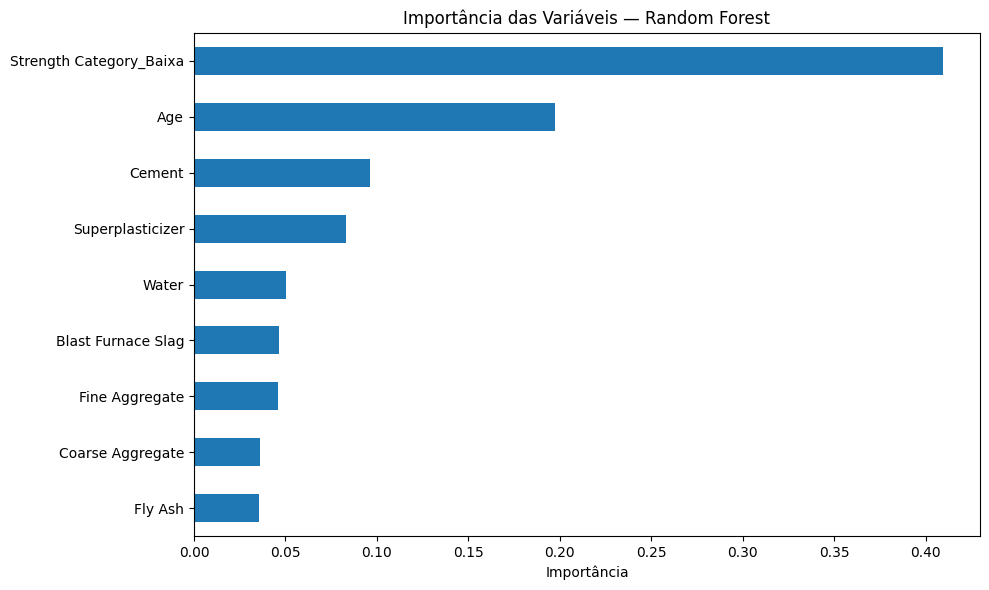

In [38]:
# Plotando gráfico de importância das variáveis:

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh')
plt.title("Importância das Variáveis — Random Forest")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()

In [39]:
# Definindo os valores das variáveis para uma nova predição:

novo_dado = {
    'Cement': 550,
    'Blast Furnace Slag': 150,
    'Fly Ash': 0,
    'Water': 180,
    'Superplasticizer': 2.5,
    'Coarse Aggregate': 1000,
    'Fine Aggregate': 700,
    'Age': 25,
}

In [40]:
# Convertendo os novos dados de predição para DataFrame:

novo_df = pd.DataFrame([novo_dado])

In [41]:
# Garantindo que as colunas sejam as mesmas do X original:

for col in X.columns:
    if col not in novo_df.columns:
        novo_df[col] = 0  # Preenche com 0 variáveis dummies ou faltantes!

In [42]:
# Reordenando as colunas:

novo_df = novo_df[X.columns]

In [43]:
# Fazer nova previsão com Random Forest:

resistencia_prevista = rf_model.predict(novo_df)

# Exibindo o resultado:
print(f"Resistência prevista do concreto: {resistencia_prevista[0]:.2f} MPa")

Resistência prevista do concreto: 72.12 MPa
